In [1]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model import ExtremeTime, ExtremeTime2
from ts.plot import Plot

%matplotlib inline

In [2]:
def evaluateAndPlot(
        loss,
        model,
        trainData,
        testData,
        numTrainSeqPlot,
        trainPlotSeqLength
):
    Plot.plotLoss(loss)

    for i in range(numTrainSeqPlot):
        idx = np.random.randint(0, trainData.shape[0] - trainPlotSeqLength)
        seq = trainData[idx:idx + trainPlotSeqLength]

        evalLoss, Ypred = model.evaluate(seq, returnPred=True)
        Ytrue = seq[1:]
        print(f'Train Eval Loss: {evalLoss}')

        Plot.plotPredTrue(Ypred, Ytrue, 'Train Data')

    testLoss, Ypred = model.evaluate(testData, returnPred=True)
    Ytrue = testData[1:]
    print(f'Test Eval Loss: {testLoss}')

    Plot.plotPredTrue(Ypred, Ytrue, 'Test Data')

# Long Term Dependency Data

In [3]:
def tryLongDataExtreme1(trainData, testData, seqLength):

    model = ExtremeTime(
        forecastHorizon=1,
        memorySize=60,
        windowSize=50,
        encoderStateSize=20,
        lstmStateSize=20
    )

    loss = model.train(
        targetSeries=trainData,
        sequenceLength=seqLength,
        numIterations=5,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.01,
                50,
                0.98
            )
        ),
        verboseLevel=1,
        returnLosses=True
    )

    numTrainSeqPlot = 5
    evaluateAndPlot(
        loss,
        model,
        trainData,
        testData,
        numTrainSeqPlot,
        seqLength
    )


def tryLongDataExtreme2(trainData, testData, seqLength):

    model = ExtremeTime2(
        forecastHorizon=1,
        memorySize=60,
        windowSize=50,
        embeddingSize=20,
        contextSize=20
    )

    loss = model.train(
        targetSeries=trainData,
        sequenceLength=seqLength,
        numIterations=5,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.01,
                50,
                0.98
            )
        ),
        verboseLevel=1,
        returnLosses=True
    )

    numTrainSeqPlot = 5
    evaluateAndPlot(
        loss,
        model,
        trainData,
        testData,
        numTrainSeqPlot,
        seqLength
    )

In [4]:
# The data generator
dataGenerator = StandardGenerator('extreme_long')

# Generated Data
n = 21500
trainN = 21000
trainData, testData = Utility.trainTestSplit(
    dataGenerator.generate(n),
    train=trainN
)

begin iteration 0
Completed Iteration: 0 | time taken:  258.70 sec | Avg Iteration Loss: 193.62936508149272
begin iteration 1
Completed Iteration: 1 | time taken:  245.77 sec | Avg Iteration Loss: 192.3091996925577
begin iteration 2
Completed Iteration: 2 | time taken:  237.07 sec | Avg Iteration Loss: 190.30786219941564
begin iteration 3
Completed Iteration: 3 | time taken:  228.77 sec | Avg Iteration Loss: 191.51951928697366
begin iteration 4
Completed Iteration: 4 | time taken:  252.16 sec | Avg Iteration Loss: 191.56298757048347


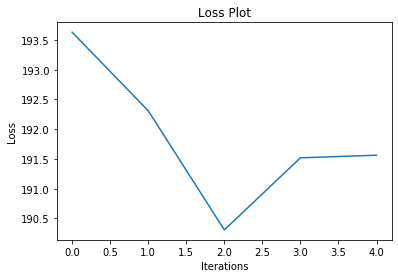

Train Eval Loss: 178.20643830593426


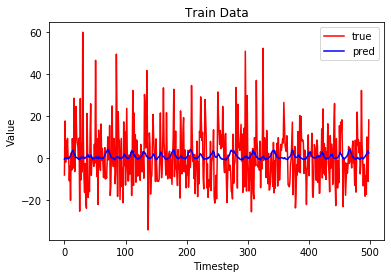

Train Eval Loss: 197.91385132269696


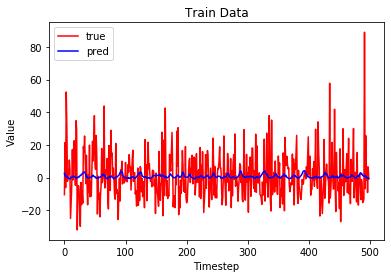

Train Eval Loss: 190.21085926887187


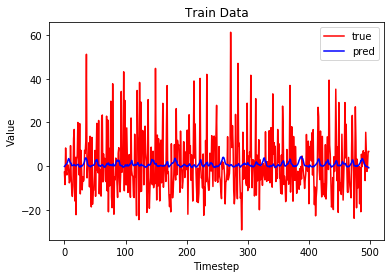

Train Eval Loss: 145.04568189295568


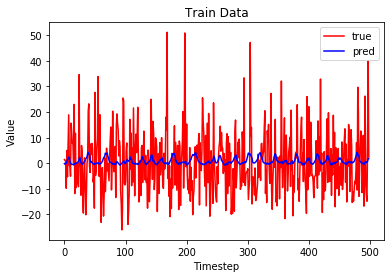

Train Eval Loss: 182.46296693152638


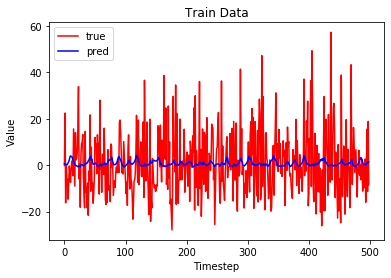

Test Eval Loss: 228.04863854961573


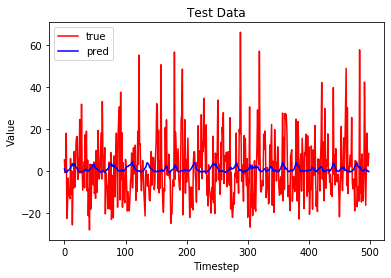

In [5]:
# Run Extreme Model 1 on Long Term Dependency Data

seqLength = 500
tryLongDataExtreme1(trainData, testData, seqLength)

begin iteration 0
Completed Iteration: 0 | time taken:  423.53 sec | Avg Iteration Loss: 191.45063841425113
begin iteration 1
Completed Iteration: 1 | time taken:  391.91 sec | Avg Iteration Loss: 189.13462031535124
begin iteration 2
Completed Iteration: 2 | time taken:  397.55 sec | Avg Iteration Loss: 191.00968620410907
begin iteration 3
Completed Iteration: 3 | time taken:  408.10 sec | Avg Iteration Loss: 191.67661875188327
begin iteration 4
Completed Iteration: 4 | time taken:  427.98 sec | Avg Iteration Loss: 191.50444557992645


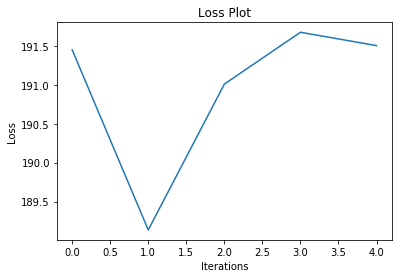

Train Eval Loss: 198.51868321255762


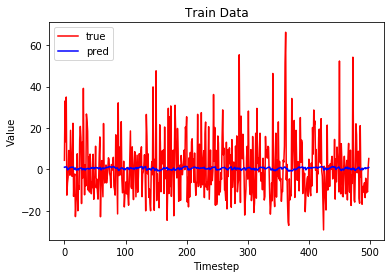

Train Eval Loss: 165.77145063589018


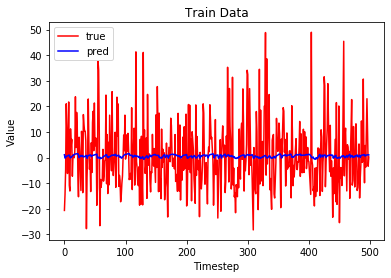

Train Eval Loss: 199.52680449606913


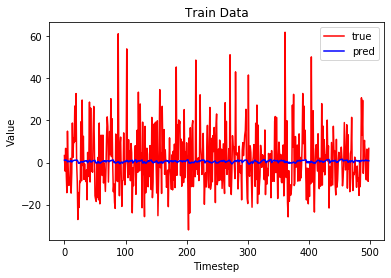

Train Eval Loss: 183.71325038841783


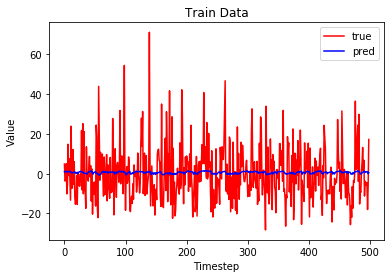

Train Eval Loss: 190.70614498702824


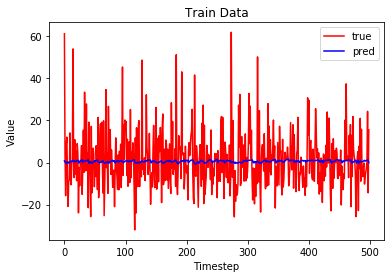

Test Eval Loss: 221.2533150933514


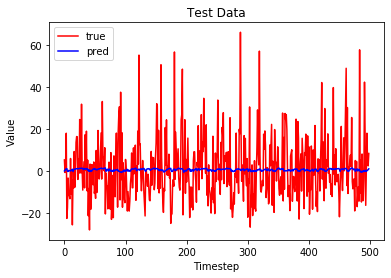

In [7]:
# Run Extreme Model 2 on Long Term Dependency Data

seqLength = 500
tryLongDataExtreme2(trainData, testData, seqLength)

# Extreme Valued Data

In [8]:
def tryExtremeDataExtreme1(trainData, testData, seqLength):

    model = ExtremeTime(
        forecastHorizon=1,
        memorySize=20,
        windowSize=10,
        encoderStateSize=10,
        lstmStateSize=10
    )

    loss = model.train(
        targetSeries=trainData,
        sequenceLength=seqLength,
        numIterations=10,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.01,
                50,
                0.99
            )
        ),
        verboseLevel=1,
        returnLosses=True
    )

    numTrainSeqPlot = 5
    evaluateAndPlot(
        loss,
        model,
        trainData,
        testData,
        numTrainSeqPlot,
        seqLength
    )


def tryExtremeDataExtreme2(trainData, testData, seqLength):

    model = ExtremeTime2(
        forecastHorizon=1,
        memorySize=20,
        windowSize=10,
        embeddingSize=10,
        contextSize=10
    )

    loss = model.train(
        targetSeries=trainData,
        sequenceLength=seqLength,
        numIterations=10,
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
                0.01,
                50,
                0.99
            )
        ),
        verboseLevel=1,
        returnLosses=True
    )

    numTrainSeqPlot = 5
    evaluateAndPlot(
        loss,
        model,
        trainData,
        testData,
        numTrainSeqPlot,
        seqLength
    )

In [9]:
# The data generator
dataGenerator = StandardGenerator('long_term')

# Generated Data
n = 21500
trainN = 21000
trainData, testData = Utility.trainTestSplit(
    dataGenerator.generate(n),
    train=trainN
)

begin iteration 0
Completed Iteration: 0 | time taken:  61.94 sec | Avg Iteration Loss: 1.1269687018052217
begin iteration 1
Completed Iteration: 1 | time taken:  65.19 sec | Avg Iteration Loss: 1.1022160597378168
begin iteration 2
Completed Iteration: 2 | time taken:  67.23 sec | Avg Iteration Loss: 1.092410615966523
begin iteration 3
Completed Iteration: 3 | time taken:  67.36 sec | Avg Iteration Loss: 1.0846040840313809
begin iteration 4
Completed Iteration: 4 | time taken:  67.40 sec | Avg Iteration Loss: 1.0821165050083799
begin iteration 5
Completed Iteration: 5 | time taken:  64.39 sec | Avg Iteration Loss: 1.0723679507856212
begin iteration 6
Completed Iteration: 6 | time taken:  64.28 sec | Avg Iteration Loss: 1.0707934666198593
begin iteration 7
Completed Iteration: 7 | time taken:  66.74 sec | Avg Iteration Loss: 1.0719317018677093
begin iteration 8
Completed Iteration: 8 | time taken:  68.89 sec | Avg Iteration Loss: 1.073563167754865
begin iteration 9
Completed Iteration: 

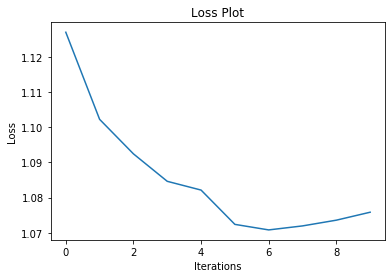

Train Eval Loss: 1.0436071859811282


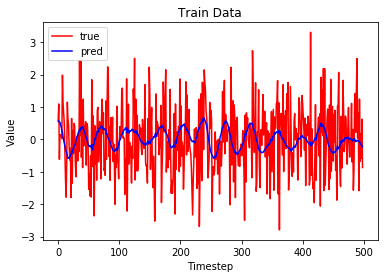

Train Eval Loss: 1.1068866705655802


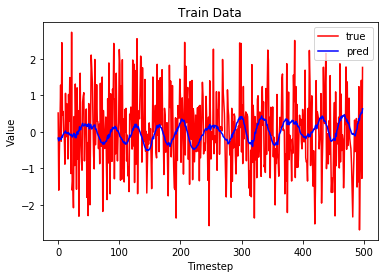

Train Eval Loss: 1.0528499979767667


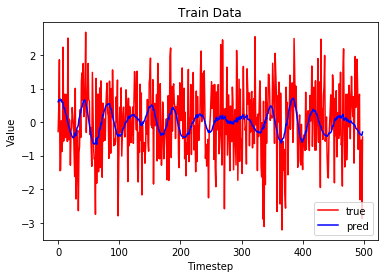

Train Eval Loss: 1.1099202890538296


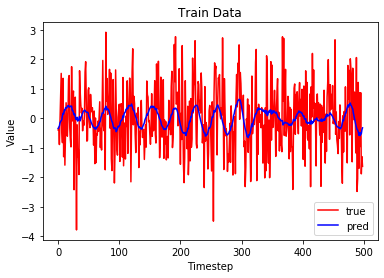

Train Eval Loss: 1.2045062628253465


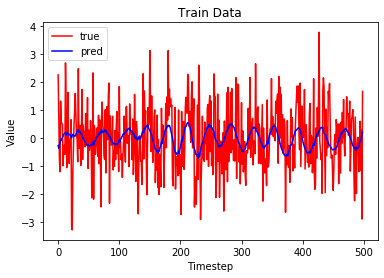

Test Eval Loss: 1.0261150671027535


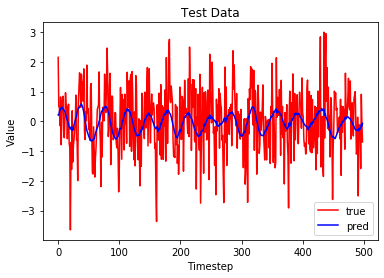

In [10]:
# Run Extreme Model 1 on Long Term Dependency Data

seqLength = 500
tryExtremeDataExtreme1(trainData, testData, seqLength)

begin iteration 0
Completed Iteration: 0 | time taken:  80.78 sec | Avg Iteration Loss: 1.1375271067614423
begin iteration 1
Completed Iteration: 1 | time taken:  81.57 sec | Avg Iteration Loss: 1.136202905787027
begin iteration 2
Completed Iteration: 2 | time taken:  76.20 sec | Avg Iteration Loss: 1.135693938729106
begin iteration 3
Completed Iteration: 3 | time taken:  80.64 sec | Avg Iteration Loss: 1.133499860659387
begin iteration 4
Completed Iteration: 4 | time taken:  70.09 sec | Avg Iteration Loss: 1.0954620928621697
begin iteration 5
Completed Iteration: 5 | time taken:  72.97 sec | Avg Iteration Loss: 1.0794562440539734
begin iteration 6
Completed Iteration: 6 | time taken:  72.60 sec | Avg Iteration Loss: 1.075135527667565
begin iteration 7
Completed Iteration: 7 | time taken:  69.27 sec | Avg Iteration Loss: 1.0705096223297663
begin iteration 8
Completed Iteration: 8 | time taken:  70.13 sec | Avg Iteration Loss: 1.069188930637619
begin iteration 9
Completed Iteration: 9 |

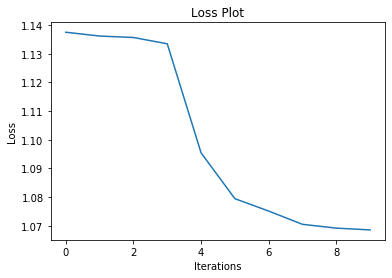

Train Eval Loss: 1.0705423269006642


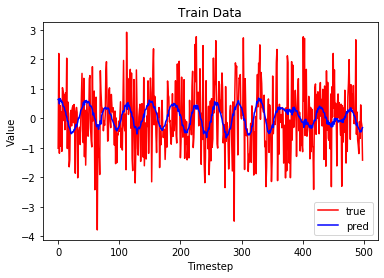

Train Eval Loss: 1.0680540788919743


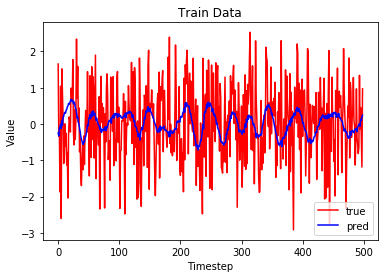

Train Eval Loss: 1.0818343662194934


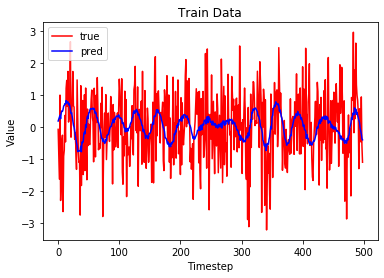

Train Eval Loss: 1.0310878430663164


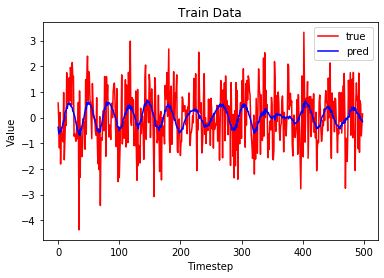

Train Eval Loss: 1.0421426794013422


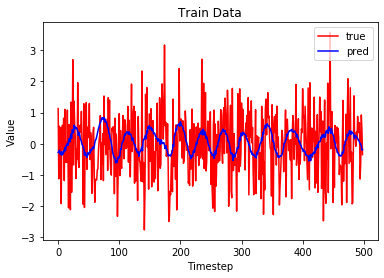

Test Eval Loss: 1.0372725877523494


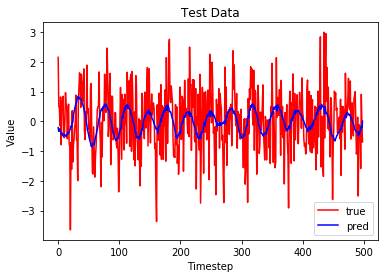

In [11]:
# Run Extreme Model 2 on Long Term Dependency Data

seqLength = 500
tryExtremeDataExtreme2(trainData, testData, seqLength)